In [56]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [57]:
# skin color (20, 40, 95)
color = int(cv.cvtColor(np.array([[[20, 40, 95]]], 'uint8'), cv.COLOR_BGR2HSV)[0][0][0])

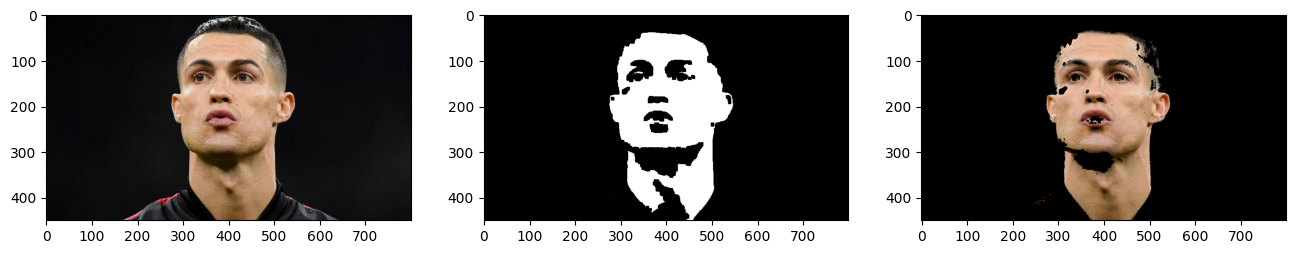

In [68]:
image = cv.imread('cr.jpg')

hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)    
lower = np.array([color - 10, 50, 50])
upper = np.array([color + 10, 255, 255])
mask = cv.inRange(hsv_image, lower, upper)
res = cv.bitwise_and(image, image, mask=mask)

_, image_b = cv.threshold(cv.cvtColor(res, cv.COLOR_BGR2GRAY), 127, 255, cv.THRESH_BINARY) 

kernel = np.ones((7,7),np.uint8)
closing = cv.morphologyEx(image_b, cv.MORPH_CLOSE, kernel)

plt.figure(figsize=(16,9))

plt.subplot(131)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(closing, cmap='gray')
plt.subplot(133)
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))